<img src="https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.70101a29a2a2.jpg">

# Aplicação de Clusterização: K-Means em Fintechs. 

## Descrição do Projeto

Este projeto visa realizar a **clusterização de clientes de uma fintech** usando o algoritmo **K-Means**. O objetivo é segmentar os clientes com base em suas características, como **renda presumida** e **idade**, e analisar suas taxas de pagamento de dívidas. Com isso, a fintech pode obter insights sobre os diferentes perfis de clientes e tomar decisões estratégicas para melhorar suas operações.
Os dados foram anonimizado bem como o nome da empresa, seguindo as diretrizes de LGPD.

## Problema de Negócio 

* Qual o perfil de clientes em cada um dos clusters dessa Fintech ? 
* Qual o percentual de clientes que realizaram o pagamento em cada um dos clusters ? 
* Quais insights e recomendações podemos fornecer a empresa ? 

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Importação da base de dados

In [2]:
df_pag = pd.read_csv('pagamento.csv')
df_pag.head()

,Pagou_Divida,Renda_Presumida,Idade
0,0,1583.33,19
1,0,1666.67,35
2,0,3583.33,26
3,0,4750.00,27
4,0,6333.33,19


## Preparação dos Dados

### Missing Values

In [3]:
df_pag.isnull().sum()

Pagou_Divida       0
Renda_Presumida    0
Idade              0
dtype: int64

### Duplicações

In [4]:
df_pag.duplicated().sum()

33

Vamos assumir que os duplicados estão incorretos e iremos excluir

In [5]:
#Vamos assumir que os duplicados são verdadeiros 
df_pag.drop_duplicates(inplace=True)

In [6]:
df_pag.duplicated().sum()

0

### Tipos de Variáveis

In [14]:
df_pag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pagou_Divida     400 non-null    int64  
 1   Renda_Presumida  400 non-null    float64
 2   Idade            400 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


## Análise Exploratória dos Dados

### Dispersão por Classe

c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


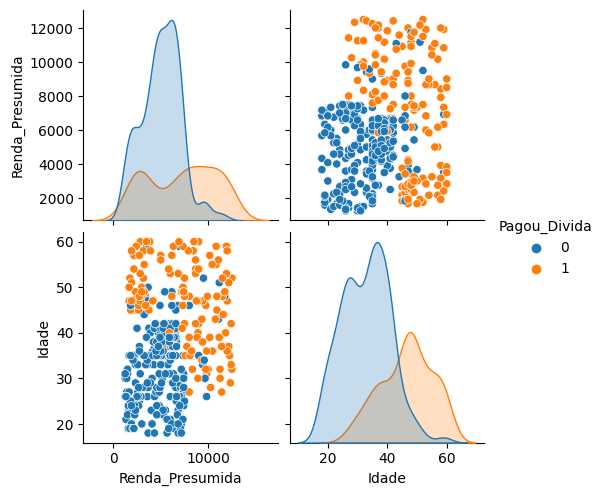

In [ ]:
sns.pairplot(df_pag, hue='Pagou_Divida')

c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


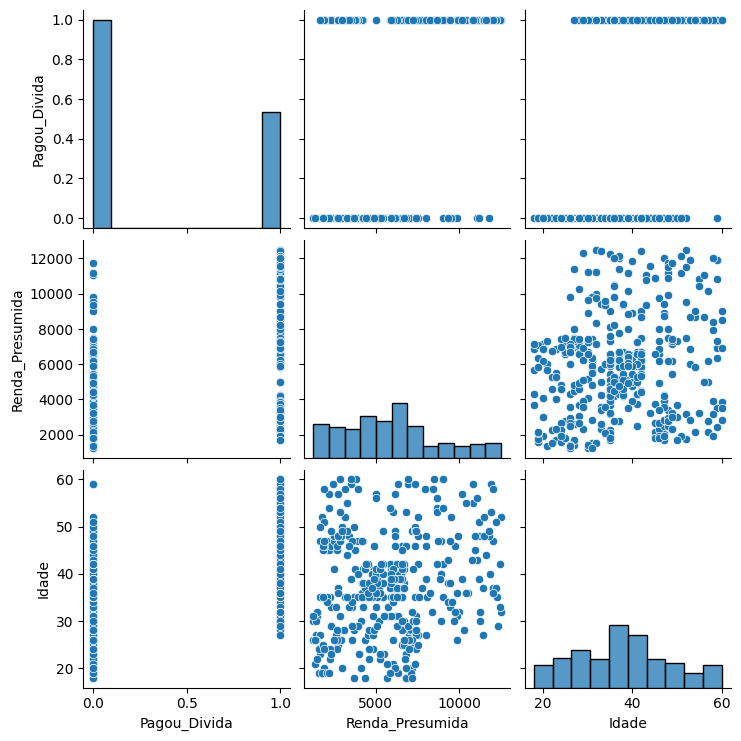

In [27]:
sns.pairplot(df_pag)

## Desenvolvimento do Modelo: K-Means

### Padronização da Escala

In [8]:
# Seleção das variáveis
df_modelo = df_pag[['Renda_Presumida',
                     'Idade']].copy()

# Padronização da Escala
x_scaler = StandardScaler()
x_scaler.fit(df_modelo)

df_modelo_scaled = pd.DataFrame(x_scaler.transform(df_modelo),
                                index=df_modelo.index,
                                columns=df_modelo.columns)

In [9]:
df_modelo.describe()

,Renda_Presumida,Idade
count,367.000000,367.000000
mean,5893.279128,37.722071
std,2897.681266,10.681383
min,1250.000000,18.000000
25%,3583.330000,29.500000
50%,5916.670000,37.000000
75%,7416.670000,46.000000
max,12500.000000,60.000000


In [10]:
df_modelo_scaled.describe()

,Renda_Presumida,Idade
count,3.670000e+02,367.000000
mean,1.548867e-16,0.000000
std,1.001365e+00,1.001365
min,-1.604600e+00,-1.848917
25%,-7.982599e-01,-0.770808
50%,8.083292e-03,-0.067693
75%,5.264453e-01,0.776045
max,2.283115e+00,2.088526


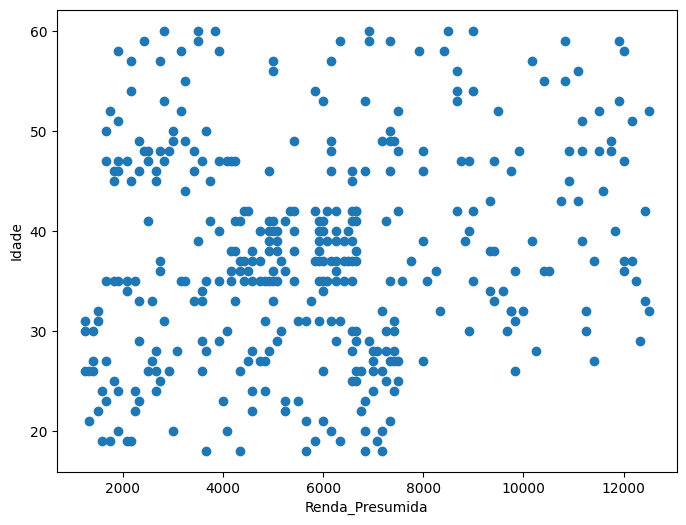

In [11]:
# Plotando Idade por Renda_Presumida
fig = plt.figure(figsize=(8,6))
plt.scatter(df_modelo['Renda_Presumida'],
            df_modelo['Idade']);
plt.xlabel('Renda_Presumida');
plt.ylabel('Idade');

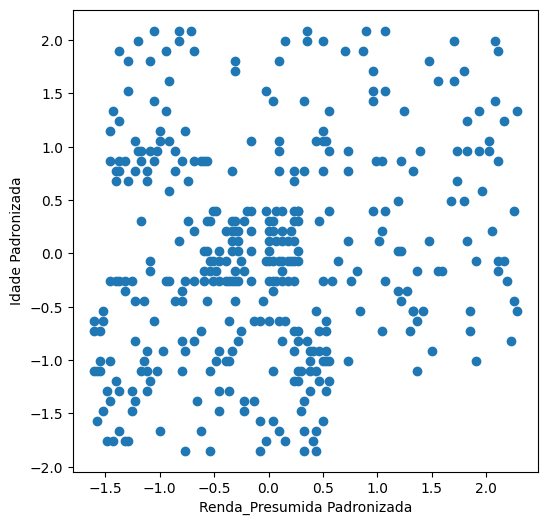

In [12]:
# Plotando Renda_Presumida por Idade
# com escala padronizada
fig = plt.figure(figsize=(6,6))
plt.scatter(df_modelo_scaled['Renda_Presumida'],
            df_modelo_scaled['Idade']);
plt.xlabel('Renda_Presumida Padronizada');
plt.ylabel('Idade Padronizada');

### Treinamento do Modelo

In [13]:
def treino_modelo_kmeans(df_scaled, k, plotagrafico=False):
    
    # treinando modelo k-means    
    modelo_km = KMeans(n_clusters=k, random_state=42)
    modelo_km.fit(df_scaled)
   
    # obtendo clusters preditos 
    cluster_predito = modelo_km.predict(df_scaled)
   
    # plotando gráficos, se necessário
    if plotagrafico:
        fig = plt.figure(figsize=(7,7))
        sns.scatterplot(x=df_scaled.iloc[:,0],
                        y=df_scaled.iloc[:,1],
                        hue=cluster_predito, palette='plasma')
        
        sns.scatterplot(x=modelo_km.cluster_centers_[:,0],
                        y=modelo_km.cluster_centers_[:,1],
                        marker='x', s=300,
                        linewidth=4, color='green', zorder=10)
    
    # sempre retorna o modelo e os clusters preditos
    return modelo_km, cluster_predito  # Certifique-se que este return esteja corretamente indentado


#### Modelo com k=2 

c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


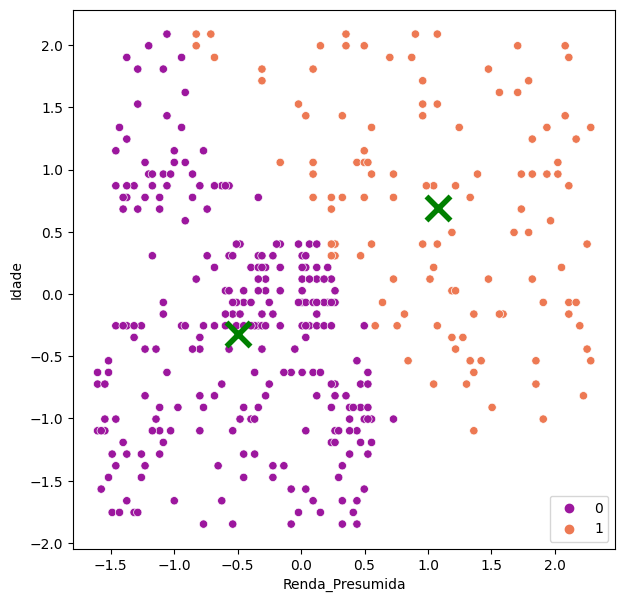

In [14]:
treino_modelo_kmeans(df_scaled=df_modelo_scaled,
                    k=2,
                    plotagrafico=True);

#### Modelo com k = 4 

c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


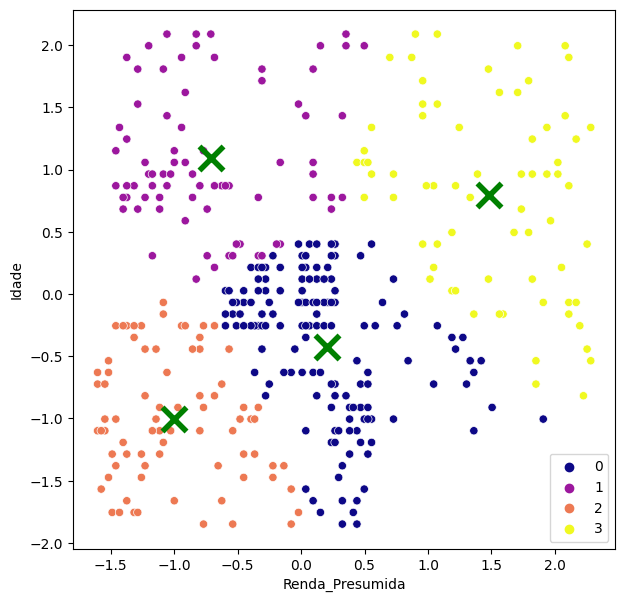

In [15]:
treino_modelo_kmeans(df_scaled=df_modelo_scaled,
                    k=4,
                    plotagrafico=True);

#### Modelo com k = 8

c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


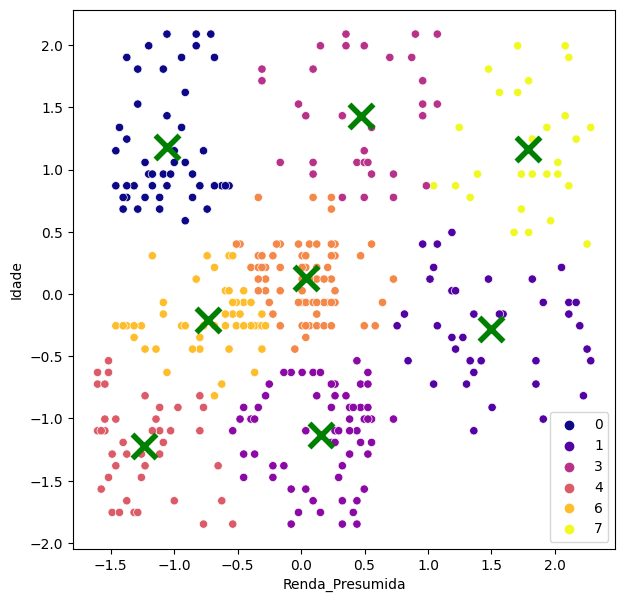

In [16]:
treino_modelo_kmeans(df_scaled=df_modelo_scaled,
                    k=8,
                    plotagrafico=True);

### Análise dos clusters criados

* Sempre o algoritmo irá buscar clusters a partir do número de cluster que iremos definir. 
* Para buscar o número ideal iremos utilizar a regra do cotovelo.  

### Cálculo da Inércia
A Inércia é a soma das distâncias entre cada observação e centróide do cluster ao qual ela pertence, ao quadrado.

### Identificação do número de clusters

c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

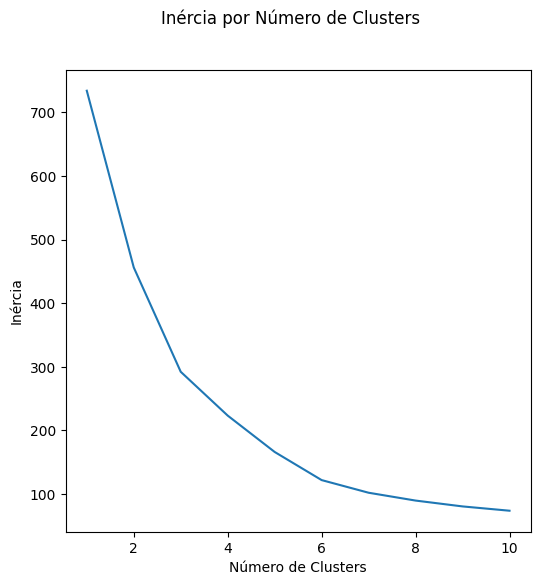

In [18]:
# Utilizando o Método do Cotovelo (Elbow-curve)
range_n_clusters = np.arange(1, 11)
inercia = []
n_clust = []

for num_clusters in range_n_clusters:
    n_clust.append(num_clusters)
    modelo, clust_pred = treino_modelo_kmeans(df_modelo_scaled,
                                              k=num_clusters )
    inercia.append(modelo.inertia_)

fig = plt.figure(figsize=(6,6))
graf = sns.lineplot(x=n_clust,  
             y=inercia)
graf.figure.suptitle('Inércia por Número de Clusters');
graf.set_xlabel('Número de Clusters');
graf.set_ylabel('Inércia');

Com um cluster podemos observar que temos mais de 700 de inércia, quando temos 2 clusters chegamos em 450 e no terceiro cluster temos uma diminuição da variação chegando em cerda de 300 e a variação para o quarto cluster é bem inferior, deste modo iremos aplicar o k igual a 3. 

### Novo Modelo K-Means com 3 Clusters (K=3)

c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


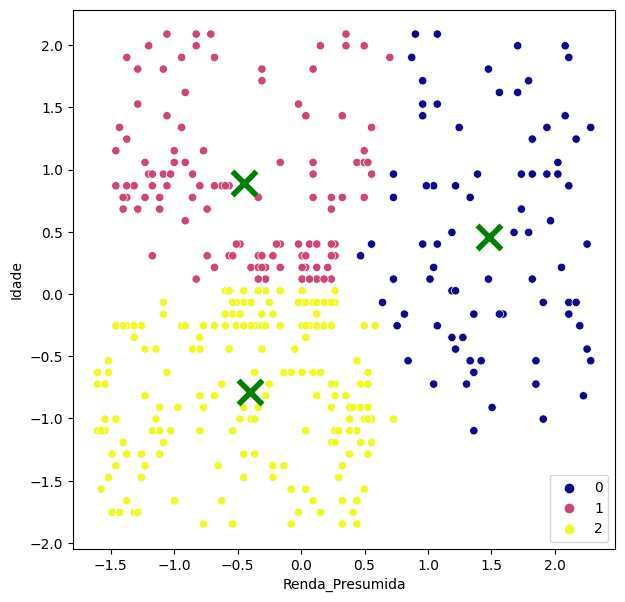

In [19]:
modelo_km3, clusterpredito = treino_modelo_kmeans(df_scaled=df_modelo_scaled,
                                                  k=3,
                                                  plotagrafico=True)

### Análise dos novos clusters criados

* Pessoas que tem uma renda à cima de 0,5 tem uma diferença em relação aos clusters 1 e 2. 
* A diferenciação dos clusters 1 e 2 será pela idade, ou seja pesssoas que tem mais que a média de idade estão no cluster 1 e as pessoas que tem menos da média de idade estão no cluster 2. 

### Interpretação e Caracterização dos Clusters
**ATENÇÃO**: deve-se utilizar o método `predict` do modelo desenvolvido sobre o **DataFrame com as variáveis padronizadas** para identificar os clusters das observações no DataFrame original.

In [20]:
df_modelo['cluster'] = clusterpredito

In [21]:
df_modelo.groupby('cluster').describe().T

cluster                           0            1            2
Renda_Presumida count     81.000000   112.000000   174.000000
                mean   10177.984074  4597.470714  4732.758678
                std     1436.730220  1792.644237  1926.146958
                min     7250.000000  1666.670000  1250.000000
                25%     9000.000000  2979.167500  3020.832500
                50%    10000.000000  4833.335000  4916.670000
                75%    11416.670000  6166.670000  6416.670000
                max    12500.000000  7916.670000  8000.000000
Idade           count     81.000000   112.000000   174.000000
                mean      42.604938    47.232143    29.327586
                std        9.261046     6.351537     5.936235
                min       26.000000    39.000000    18.000000
                25%       35.000000    41.000000    25.000000
                50%       42.000000    47.000000    29.000000
                75%       49.000000    50.250000    35.000000
                max       60.000000    60.000000    38.000000

#### Interpretação

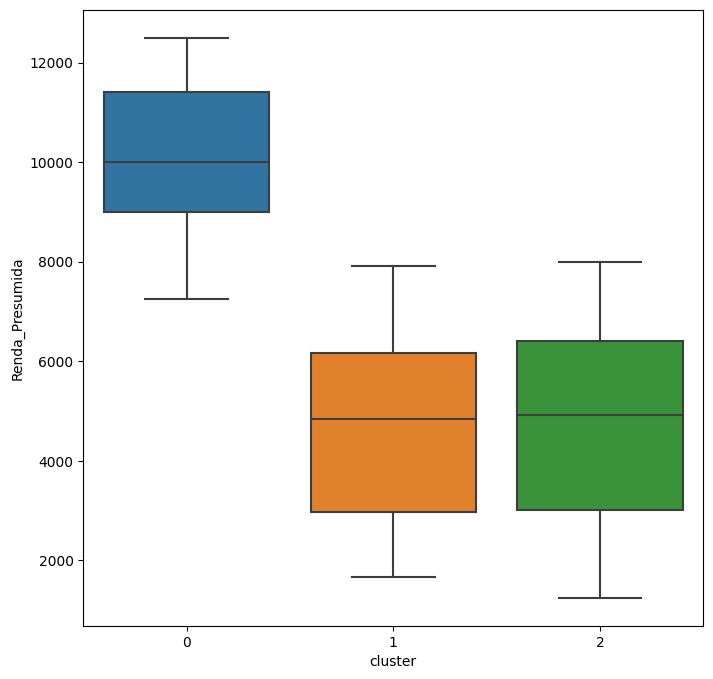

In [22]:
# Análise dos clusters em relação a Renda Presumida
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='cluster',
            y='Renda_Presumida', 
            data=df_modelo);

Podemos verificar que os clusters 1 e 2 tem uma renda presumida menor, enquanto o cluster 0 tem uma renda presumida maior. 

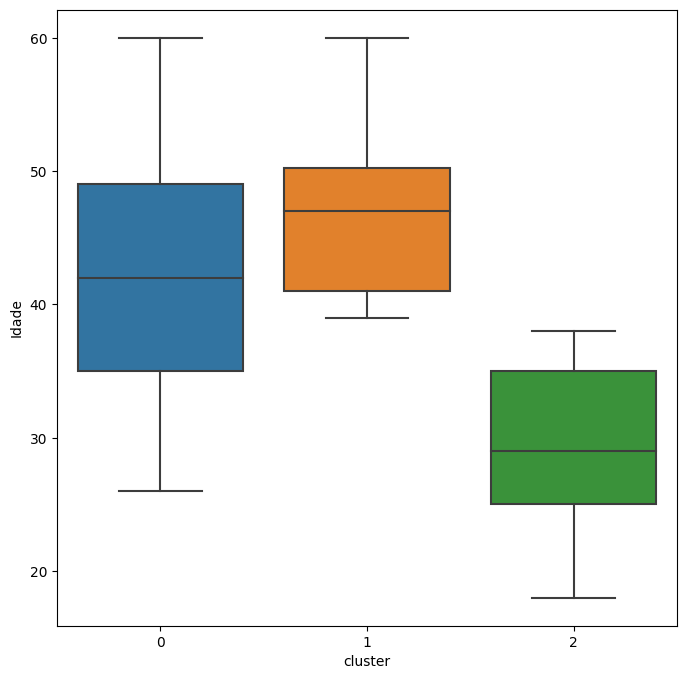

In [23]:
# Análise dos clusters em relação a Idade
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='cluster',
            y='Idade', 
            data=df_modelo);

cluster 2 são pessoas mais jovens que a média, enquanto o cluster 1 tem pessoas mais velhas e o cluster 0 tem pessoas mais velhas como também pessoas mais jovens. 

#### Caracterização dos clusters 

* Cluster 0 tem alta renda presumida e em média tem maior idade.
* Cluster 1 tem baixa renda presumida e maior idade.
* Cluster 2 tem baixa renda presumida e menor idade. 

### Avaliação em relação aos Pagamentos
Após desenvolver o modelo de cluster para construir grupos, vamos avaliar esses grupos em relação aos pagamentos.

In [24]:
df_pag.head()

,Pagou_Divida,Renda_Presumida,Idade
0,0,1583.33,19
1,0,1666.67,35
2,0,3583.33,26
3,0,4750.00,27
4,0,6333.33,19


In [25]:
df_modelo_pag = pd.concat([df_modelo[['cluster']],
                             df_pag[['Pagou_Divida']]], 
                            axis=1)
df_modelo_pag.head()

,cluster,Pagou_Divida
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [26]:
df_modelo_pag.pivot_table(values='Pagou_Divida', 
                            index='cluster')

,Pagou_Divida
cluster,
0,0.851852
1,0.571429
2,0.028736


* Cluster 0 tem 85% de pessoas que pagaram a divida. 
* Cluster 1 tem 57% de pessoas que pagaram a divída.
* Cluster 2 tem 2,8% de pessoas que pagaram a divída.

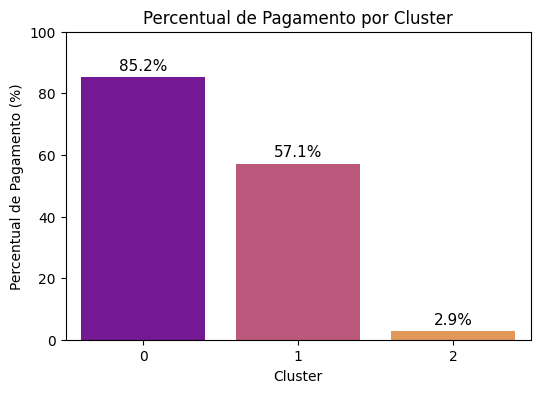

In [36]:
# Plotando a tabela pivotada
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=pivot_df.index, y=pivot_df['Pagou_Divida'] * 100,palette='plasma')
plt.title('Percentual de Pagamento por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentual de Pagamento (%)')
plt.ylim(0, 100)

# Adicionando os rótulos de dados
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', 
                fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()


## Insights e Recomendações 

Com base na análise dos clusters e taxas de pagamento, podemos fornecer os seguintes insights e recomendações para a fintech:

### Cluster 0 (Alta Renda):

* Este cluster representa clientes com alta renda e uma alta taxa de pagamento (85%). Esses clientes são altamente lucrativos, então a fintech deve focar em:
* Ofertas Personalizadas: Criar produtos financeiros premium e investimentos mais sofisticados para atrair ainda mais esse perfil.
* Fidelização: Manter a satisfação desses clientes, oferecendo recompensas por pontualidade no pagamento e acesso a serviços exclusivos.

### Cluster 1 (Baixa Renda, Idade Avançada):

* Este grupo, com uma taxa de pagamento de 57%, é um perfil como uma taxa de pagamento inferior ao grupo 0. No entanto, uma parte significativa ainda realiza os pagamentos.
* Educação Financeira: Implementar programas de educação financeira pode aumentar a conscientização sobre a importância de pagar dívidas em dia.
* Ofertas de Refinanciamento: Produtos de refinanciamento ou planos com taxas de juros reduzidas podem ser oferecidos para ajudar esses clientes a gerenciar suas finanças e, potencialmente, melhorar as taxas de pagamento.

### Cluster 2 (Jovens com Baixa Renda):

* Este grupo apresenta um desafio significativo, com uma taxa de pagamento muito baixa (2,8%). É possível que esses clientes tenham dificuldades financeiras ou estejam menos comprometidos com a fintech.
* Ações de Recuperação: Programas de recuperação de crédito, onde a fintech oferece renegociações ou redução da dívida em troca de pagamentos mais acessíveis.
* Foco em Experiências: Criar ofertas que apelam ao estilo de vida dos jovens, como soluções de pagamento flexíveis ou serviços que ajudem a melhorar sua educação financeira, pode aumentar o engajamento e a taxa de pagamento no longo prazo

### Segmentação e Comunicação Personalizada:
Com base nos clusters, algumaas estratégias de comunicação diferenciadas podem ser aplicadas:

* Cluster 0: Comunicação focada em status e exclusividade.
* Cluster 1: Mensagens que reforcem a estabilidade financeira e as vantagens de quitar dívidas.
* Cluster 2: Focar na flexibilidade e em facilidades para quitar débitos pequenos de forma mais leve.

### Estratégias de Crescimento:

* Considerando a baixa taxa de pagamento no Cluster 2, a fintech pode avaliar a criação de um sistema de recompensas progressivas que incentiva o pagamento contínuo, permitindo que os jovens clientes construam um histórico positivo com a fintech.

### Conclusão


* A análise de clusters com K-Means aplicada revelou perfis claros entre os clientes. 
* Baseado nos resultados, a fintech pode tomar decisões estratégicas que podem aumentar a taxa de pagamento e melhorar o relacionamento com os clientes e buscar novos produtos para públicos diferentes.